In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import glob
import random

np.random.seed(222)
random.seed(222)


In [3]:
import os

current_path = os.getcwd()
print("当前路径:", current_path)  # 输出示例: /Users/yourname/projects

当前路径: /home/jpc/JZF


In [4]:
new_path = "/home/jpc/JZF"
os.chdir(new_path)
#adata = sc.read_h5ad("./adata_cluster.h5ad")

In [5]:
all_data_dir = "/home/jpc/JZF/scRNA_seq/std_file/scRNA"
import os
all_data_dir_list = os.listdir(all_data_dir)

In [6]:
all_data_dict = {}
for sample_dir in all_data_dir_list:
    all_data_dict[sample_dir] = f"{all_data_dir}/{sample_dir}"
all_data_dict

{'CQFT': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/CQFT',
 'ZMMP': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/ZMMP',
 'CYWP': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/CYWP',
 'QXPT': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/QXPT',
 'CYWT': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/CYWT',
 'ZMMT': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/ZMMT',
 'DLHP': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/DLHP',
 'QXPP': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/QXPP',
 'WDHP': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/WDHP',
 'CQFP': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/CQFP',
 'HTJP': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/HTJP',
 'WDHT': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/WDHT',
 'DLHT': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/DLHT',
 'HTJT': '/home/jpc/JZF/scRNA_seq/std_file/scRNA/HTJT'}

In [7]:
sample_adata = sc.read_10x_mtx(
    path='/home/jpc/JZF/scRNA_seq/std_file/scRNA/CYWP',                # 存放文件的目录
    var_names='gene_symbols', # 使用基因符号作为列名（也可用 'gene_ids'）
    make_unique=True         # 处理重复基因符号
    )

In [8]:
sample_adata

AnnData object with n_obs × n_vars = 10464 × 30110
    var: 'gene_ids', 'feature_types'

In [9]:
adatas = {}
for sample_id, path in all_data_dict.items():
    #path = EXAMPLE_DATA.fetch(filename)
    sample_adata = sc.read_10x_mtx(
    path,                # 存放文件的目录
    var_names='gene_symbols', # 使用基因符号作为列名（也可用 'gene_ids'）
    make_unique=True         # 处理重复基因符号
    )
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())
adata

/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


sample
DLHP    16277
QXPP    14656
WDHT    12900
QXPT    12853
HTJT    12211
ZMMT    11008
DLHT    10886
HTJP    10803
CQFT    10800
CYWT    10646
CYWP    10464
WDHP    10462
ZMMP     9503
CQFP     9105
Name: count, dtype: int64


AnnData object with n_obs × n_vars = 162574 × 25365
    obs: 'sample'

In [10]:
adata.layers["counts"] = adata.X.copy()

In [11]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

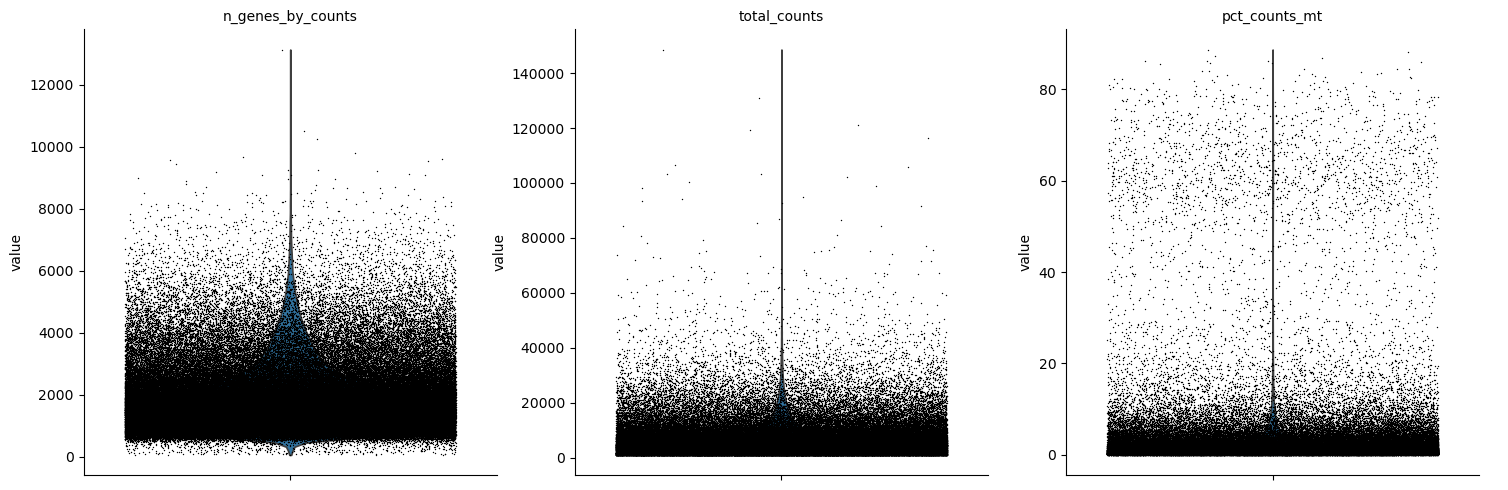

In [12]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [ ]:
#sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [ ]:
adata.obs.keys()

In [13]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [14]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_ribo > 3, :]
adata = adata[adata.obs.pct_counts_mt < 30, :].copy()

In [ ]:
#adata.obsm.keys()
#adata.obs["sample"].unique()

In [ ]:
#adata.obs.shape
#adata.obs.keys()
#

In [ ]:
# 基因集来自Seurat
s_genes = [
    "MCM5", "PCNA", "TYMS", "FEN1", "MCM2", "MCM4", "RRM1",
    "UNG", "GINS2", "MCM6", "CDCA7", "DTL", "PRIM1", "UHRF1",
    "HELLS", "RFC2", "RPA2", "NASP", "RAD51AP1", "GMNN", "WDR76",
    "SLBP", "CCNE2", "UBR7", "POLD3", "MSH2", "ATAD2", "RAD51",
    "RRM2", "CDC45", "CDC6", "EXO1", "TIPIN", "DSCC1", "BLM",
    "CASP8AP2", "USP1", "CLSPN", "POLA1", "CHAF1B", "BRIP1", "E2F8"
]

g2m_genes = [
    "HMGB2", "CDK1", "NUSAP1", "UBE2C", "BIRC5", "TPX2", "TOP2A", "NDC80",
    "CKS2", "NUF2", "CKS1B", "MKI67", "TMPO", "CENPF", "TACC3", "SMC4",
    "CCNB2", "CKAP2L", "CKAP2", "AURKB", "BUB1", "KIF11", "ANP32E", "TUBB4B",
    "GTSE1", "KIF20B", "HJURP", "CDCA3", "CDC20", "TTK", "CDC25C", "KIF2C",
    "RANGAP1", "NCAPD2", "DLGAP5", "CDCA2", "CDCA8", "ECT2", "KIF23", "HMMR",
    "AURKA", "PSRC1", "ANLN", "LBR", "CKAP5", "CENPE", "CTCF", "NEK2",
    "G2E3", "GAS2L3", "CBX5", "CENPA"
]


# 细胞周期评估
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [ ]:
#adata.obs

In [ ]:
cell_cycle_genes = s_genes+g2m_genes

In [ ]:
#adata_raw = adata.copy()
#adata_cc_genes = adata_raw[:, cell_cycle_genes]
#sc.pp.scale(adata_cc_genes, max_value=10)
#sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [ ]:
#import igraph
#print(igraph.__version__)

In [ ]:
# 回归掉 S/G2M 分数
#sc.pp.regress_out(adata, ['S_score', 'G2M_score'])

In [15]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [ ]:
adata.write("./adata_scale.h5ad")

In [16]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000, batch_key="sample")

In [ ]:
#sc.pl.highly_variable_genes(adata)

In [18]:
sc.tl.pca(adata,n_comps=50)

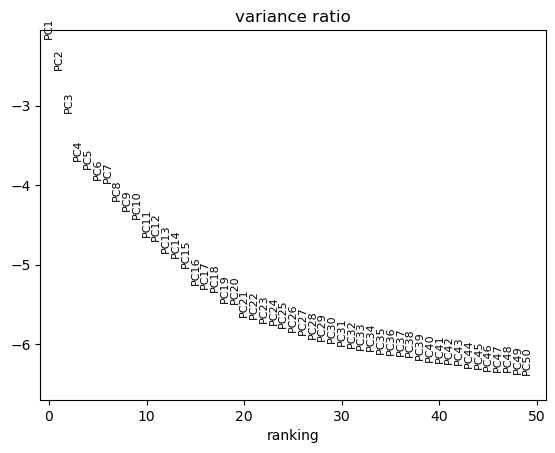

In [19]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [20]:
sc.pp.scrublet(adata, batch_key="sample")

In [21]:
adata_filtered = adata[adata.obs["predicted_doublet"] == False].copy()

In [22]:
import bbknn
# sc.external.pp.bbknn(adata, batch_key="sample")
# 保存一份用于对比
#adata_bbknn = adata1.copy()

# 1. 使用 BBKNN 整合邻接图（基于 harmony 的输出）
sc.external.pp.bbknn(adata_filtered, batch_key='sample')
sc.tl.umap(adata_filtered)
#sc.tl.leiden(adata)
#sc.pl.umap(adata_bbknn, color=["sample", "leiden"], title="BBKNN整合效果")

/home/jpc/anaconda3/envs/scanpy_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
for res in np.arange(0.2, 2.01, 0.2):
    sc.tl.leiden(
        adata_filtered, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

In [ ]:
#adata_filtered.obs.columns

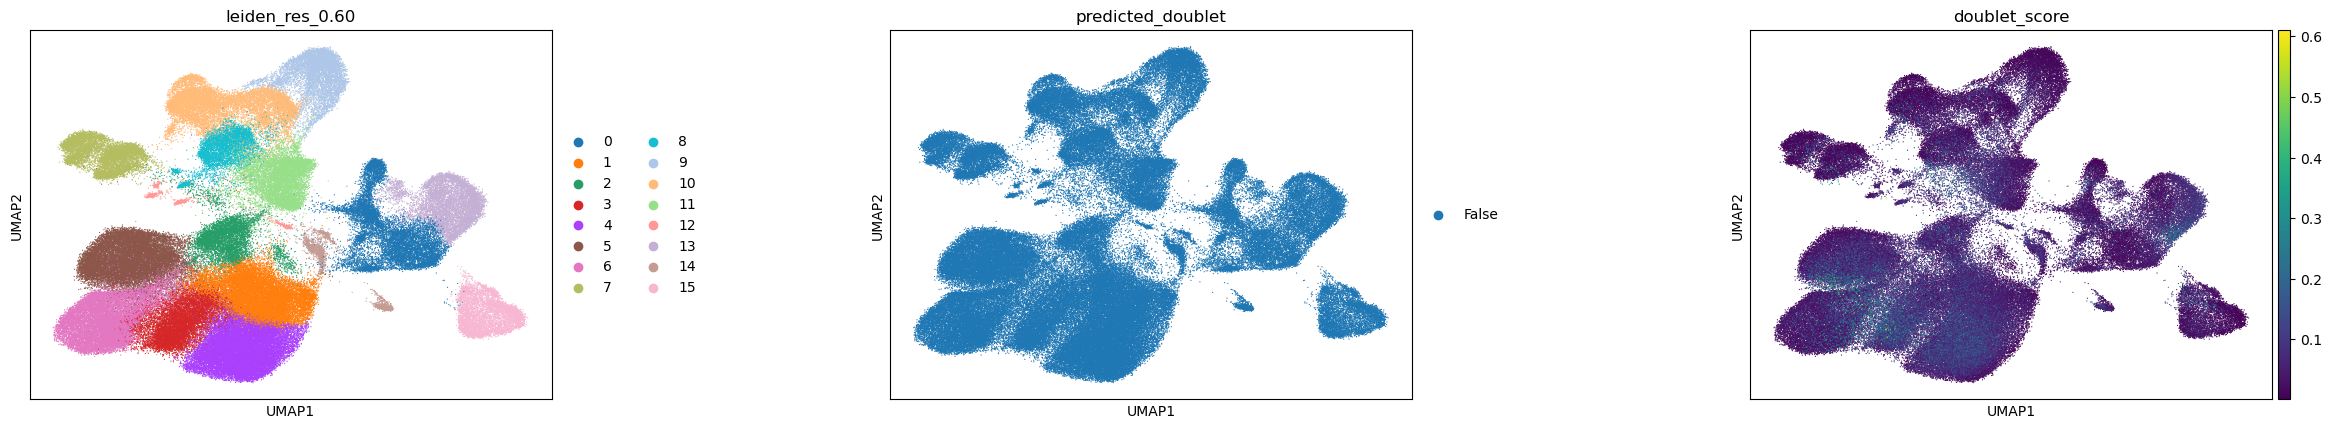

In [24]:
sc.pl.umap(
    adata_filtered,
    color=["leiden_res_0.60", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)

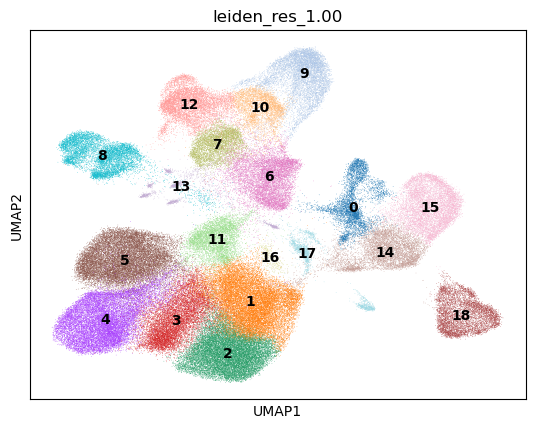

In [28]:
sc.pl.umap(
    adata_filtered,
    color=["leiden_res_1.00"],
    legend_loc="on data",
)

In [25]:
marker_genes = { 
  "Immu": ["PTPRC"],
  "Mast cells":["TPSAB1","CPA3","MS4A2"],
  "ILC":["KIT","KLRF1","IL7R"],
  #"Cell Cycle" :["TOP2A","MKI67"],
  "Monocyte":["CD68","FCGR3A","CD14","MARCO"],
  "B cells":["CD79A","CD79B","CD19","MS4A1"],
  "Plasma cells":["JCHAIN","IGKC"],
 # "platelets":["PF4", "PPBP"], #,"GP9"
  "T cells":["CD3D","CD3E","CD3G"],
  "CD4+ T cells":["CD4"],
  "CD8+ T cells":["CD8A","CD8B"],
  "NK" :["NKG7","KLRG1","KLRC1"],
    "Myeloid":["CD14", "LYZ", "S100A8", "FCGR3A"],
  "DC":["CD1C","LAMP3"] ,
    "Macro":["CD68","LYZ","MSR1","CD163","MRC1"],
  "Neu":["FCGR3B","CXCR2","SLC25A37","G0S2","CXCR1","ADGRG3"],
    "Epi": ["EPCAM", "KRT18",  "KRT19"],
    "Fibroblasts": ["PDGFRA", "PDGFRB", "COL1A1", "COL1A2", "DCN", "FAP"], #, "LUM"
    "Myofibroblasts": ["ACTA2", "TAGLN", "MYH11"],
    "Endo": ["PECAM1", "VWF", "CDH5", "ENG", "TIE1", "CLDN5"],
    "Pericytes": ["RGS5", "PDGFRB", "CSPG4", "MCAM", "ACTA2"]
}

In [26]:
#adata

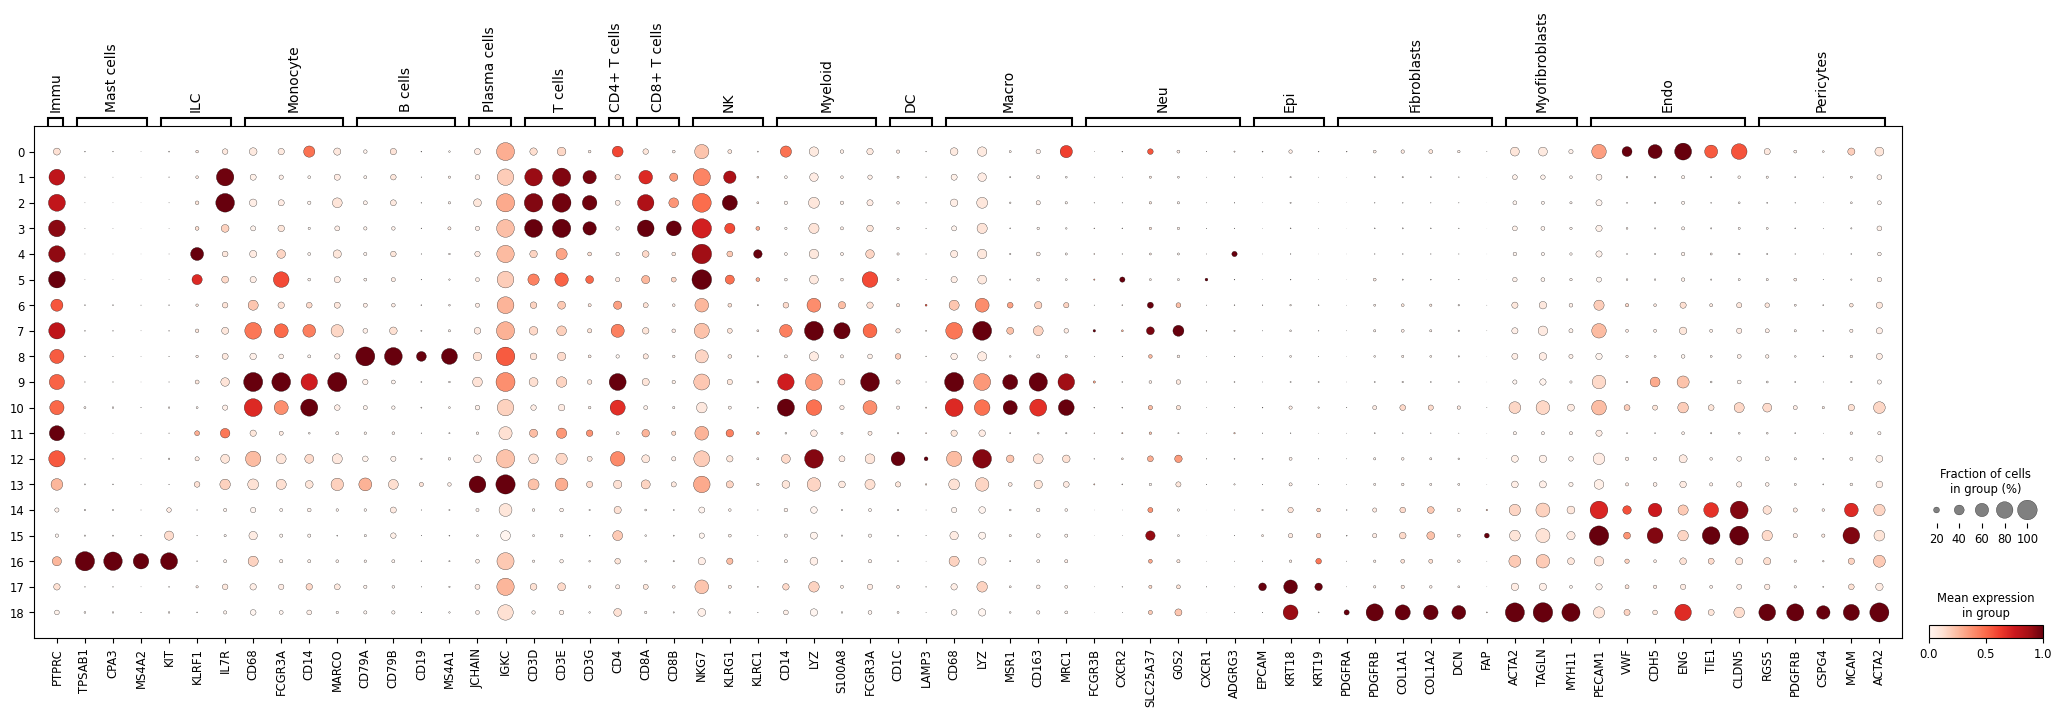

In [27]:
sc.pl.dotplot(adata_filtered, marker_genes, groupby="leiden_res_1.00", standard_scale="var")